In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_profile = pd.read_csv('F:/Sapienza/ADM/ADM_HW2/instagram_profiles.zip', usecols = ['profile_id','profile_name','firstname_lastname','n_posts','followers','following', 'cts'] , delimiter = '\t')

In [3]:
data_post = pd.read_csv('F:/Sapienza/ADM/ADM_HW2/instagram_posts.zip', usecols = ['sid','profile_id','post_id','location_id','post_type','numbr_likes','number_comments'],delimiter = '\t')

In [200]:
data_loc = pd.read_csv('F:/Sapienza/ADM/ADM_HW2/instagram_locations.zip',delimiter = '\t')

Plot the top 10 most popular users in terms of followers and their number of posts.

In [230]:
#create a sub-dataframe of 10 popular profiles
selected = data_profile.sort_values(['followers','n_posts'] , ascending = [False,False]).head(10)

In [85]:
selected

,profile_id,profile_name,firstname_lastname,following,followers,n_posts,cts
2880218,2.502532e+07,instagram,Instagram,226.0,285457645.0,5760.0,NaN
2582507,3.416684e+06,victoriassecret,Victoria's Secret,549.0,65269440.0,7355.0,NaN
3820939,2.082449e+07,nba,NBA,817.0,35339708.0,28816.0,NaN
701965,1.876191e+08,louisvuitton,Louis Vuitton Official,5.0,30689316.0,3352.0,NaN
2414951,2.125507e+09,buzzfeedtasty,Tasty,298.0,30246783.0,2791.0,NaN
2785241,4.968651e+08,andresiniesta8,Andres Iniesta,151.0,29542143.0,990.0,2019-05-08 23:54:35.377 -0400
333193,2.341008e+07,hm,H&M,403.0,29176804.0,4566.0,2018-05-31 19:33:46.022 -0400
3934581,2.423993e+07,princessyahrini,Syahrini,835.0,29042823.0,4719.0,2019-06-26 15:05:53.411 -0400
1311970,5.041706e+07,danbilzerian,Dan Bilzerian,252.0,26476004.0,1311.0,NaN
1703764,9.070254e+08,akshaykumar,Akshay Kumar,5.0,26252169.0,1173.0,2019-05-14 08:29:29.754 -0400


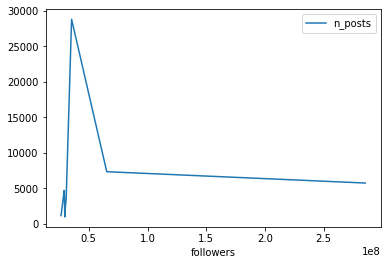

In [86]:
selected.plot(x = 'followers' , y = 'n_posts', kind = 'line')
plt.show()

Who is the most influential user?

In [89]:
# top 1 profile id based on the number of followers and posts
selected['profile_name'].head(1)

2880218    instagram
Name: profile_name, dtype: object

Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

In [213]:
merged = pd.merge(selected['profile_id'], data_post[['profile_id','post_id','location_id']], on = 'profile_id', how = "left")

In [221]:
locations = merged.fillna(0)

In [222]:
locations

,profile_id,post_id,location_id
0,25025320.0,Ss3ULFBQeM,5.332856e+06
1,25025320.0,BeECzRuh1O6,5.873874e+08
2,25025320.0,Brl3hGMAxiy,8.770667e+14
3,25025320.0,BZNHb3ijnDT,3.500213e+08
4,25025320.0,uvObMahQV4,5.243120e+08
...,...,...,...
136,907025384.0,Bwt0a6unVO0,0.000000e+00
137,907025384.0,BwqyXzInHvZ,0.000000e+00
138,907025384.0,Bwmmqhpn2gs,0.000000e+00
139,907025384.0,BwmiC_ZHyF8,0.000000e+00


In [225]:
location_freq = locations.groupby(['location_id','profile_id']).count()

In [226]:
location_freq.sort_values(by = 'post_id', ascending = False)

post_id
location_id  profile_id           
0.000000e+00 9.070254e+08       12
             2.125507e+09       12
2.130118e+08 2.423993e+07        9
0.000000e+00 4.968651e+08        7
             5.041706e+07        5
...                            ...
2.389998e+08 2.502532e+07        1
2.368281e+08 5.041706e+07        1
2.343171e+08 2.082449e+07        1
2.293029e+08 2.341008e+07        1
2.019565e+15 4.968651e+08        1

[96 rows x 1 columns]

How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

In [8]:
post = data_post.fillna(0)

In [113]:
#create a sub-dataframe 
merged_2 = pd.merge(selected['profile_id'], data_post[['profile_id','post_id','post_type','numbr_likes','number_comments']], on = 'profile_id', how = "left")

In [114]:
merged_2

,profile_id,post_id,post_type,numbr_likes,number_comments
0,25025320.0,Ss3ULFBQeM,1,125428.0,1240.0
1,25025320.0,BeECzRuh1O6,1,669786.0,4818.0
2,25025320.0,Brl3hGMAxiy,1,1914299.0,20065.0
3,25025320.0,BZNHb3ijnDT,1,840588.0,3627.0
4,25025320.0,uvObMahQV4,1,385494.0,5664.0
...,...,...,...,...,...
136,907025384.0,Bwt0a6unVO0,1,241543.0,1152.0
137,907025384.0,BwqyXzInHvZ,1,797506.0,2733.0
138,907025384.0,Bwmmqhpn2gs,1,921671.0,9349.0
139,907025384.0,BwmiC_ZHyF8,1,1402087.0,16180.0


In [115]:
merged_2['post_type'].value_counts()
#top 10 popular users just share type 1 and 2;in other words, photo and video

1    128
2     13
Name: post_type, dtype: int64

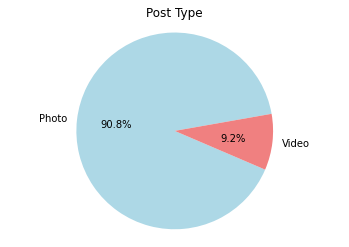

In [116]:
my_labels = 'Photo','Video'
my_colors = ['lightblue','lightcoral']
plt.pie(merged_2['post_type'].value_counts(), labels = my_labels, autopct = '%1.1f%%', startangle = 10, colors = my_colors)
plt.title('Post Type')
plt.axis('equal')
plt.show()

How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

In [131]:
#create sub-dataframe based on type of post
photo = merged_2[merged_2['post_type'] == 1]
video = merged_2[merged_2['post_type'] == 2]
both  = merged_2[merged_2['post_type'] == 3]

In [132]:
#the number of rows in each sub-data frame
n_photo = len(photo)
n_video = len(video)
n_both  = len(both)

In [133]:
print(n_photo)
print(n_video)
print(n_both)
#top 10 profiles just share photo and video

128
13
0


In [137]:
#the average of likes and comments for their photo
avg_photo = photo.groupby(['profile_id','post_type']).agg('sum')
avg_photo

,,numbr_likes,number_comments
profile_id,post_type,,
3.416684e+06,1,1153749.0,2192.0
2.082449e+07,1,3149064.0,14142.0
2.341008e+07,1,162427.0,730.0
2.423993e+07,1,3263087.0,17421.0
2.502532e+07,1,28083937.0,207802.0
5.041706e+07,1,12946699.0,128921.0
1.876191e+08,1,186857.0,867.0
4.968651e+08,1,5676272.0,26845.0
9.070254e+08,1,13352324.0,85572.0


In [138]:
#the average of likes and comments for their video
avg_video =  video.groupby(['profile_id','post_type']).agg('sum')
avg_video

,,numbr_likes,number_comments
profile_id,post_type,,
3416684.0,2,522816.0,1166.0
20824486.0,2,1036478.0,5134.0
24239929.0,2,125291.0,2710.0
25025320.0,2,1780229.0,17248.0


In [139]:
#the average of followers
merged_3 = pd.merge(avg_photo, avg_video, on = 'profile_id', how = "left")

In [140]:
merged_3

,numbr_likes_x,number_comments_x,numbr_likes_y,number_comments_y
profile_id,,,,
3.416684e+06,1153749.0,2192.0,522816.0,1166.0
2.082449e+07,3149064.0,14142.0,1036478.0,5134.0
2.341008e+07,162427.0,730.0,NaN,NaN
2.423993e+07,3263087.0,17421.0,125291.0,2710.0
2.502532e+07,28083937.0,207802.0,1780229.0,17248.0
5.041706e+07,12946699.0,128921.0,NaN,NaN
1.876191e+08,186857.0,867.0,NaN,NaN
4.968651e+08,5676272.0,26845.0,NaN,NaN
9.070254e+08,13352324.0,85572.0,NaN,NaN


In [141]:
merged_4 = pd.merge(selected[['profile_id','profile_name','followers']], merged_3, on = 'profile_id', how = "left")

In [149]:
#rename columns
merged_4.columns = ['profile_id','profile_name','followers','PhotoLikeNumber','PhotoCmNumber','VideoLikeNumber','VideoCmNumber']

In [168]:
merged_4.sort_values(by='followers', inplace = True)

In [169]:
merged_4

,profile_id,profile_name,followers,PhotoLikeNumber,PhotoCmNumber,VideoLikeNumber,VideoCmNumber
9,9.070254e+08,akshaykumar,26252169.0,13352324.0,85572.0,NaN,NaN
8,5.041706e+07,danbilzerian,26476004.0,12946699.0,128921.0,NaN,NaN
7,2.423993e+07,princessyahrini,29042823.0,3263087.0,17421.0,125291.0,2710.0
6,2.341008e+07,hm,29176804.0,162427.0,730.0,NaN,NaN
5,4.968651e+08,andresiniesta8,29542143.0,5676272.0,26845.0,NaN,NaN
4,2.125507e+09,buzzfeedtasty,30246783.0,1311218.0,12521.0,NaN,NaN
3,1.876191e+08,louisvuitton,30689316.0,186857.0,867.0,NaN,NaN
2,2.082449e+07,nba,35339708.0,3149064.0,14142.0,1036478.0,5134.0
1,3.416684e+06,victoriassecret,65269440.0,1153749.0,2192.0,522816.0,1166.0
0,2.502532e+07,instagram,285457645.0,28083937.0,207802.0,1780229.0,17248.0


<AxesSubplot:xlabel='followers'>

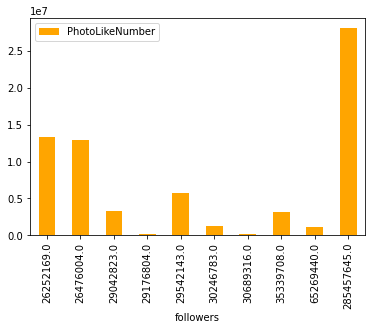

In [181]:
merged_4.plot.bar( x = 'followers', y = 'PhotoLikeNumber', color = 'orange')

<AxesSubplot:xlabel='followers'>

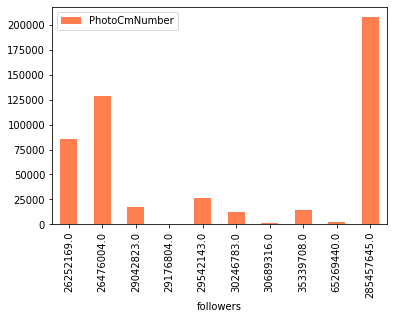

In [180]:
merged_4.plot.bar( x = 'followers', y = 'PhotoCmNumber', color = 'coral')

<AxesSubplot:xlabel='followers'>

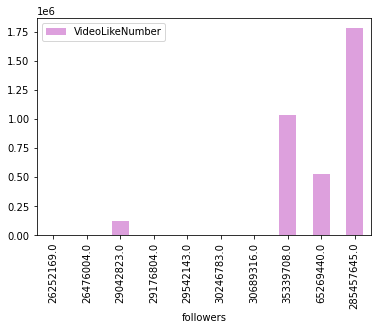

In [179]:
merged_4.plot.bar( x = 'followers', y = 'VideoLikeNumber', color = 'plum')

<AxesSubplot:xlabel='VideoCmNumber'>

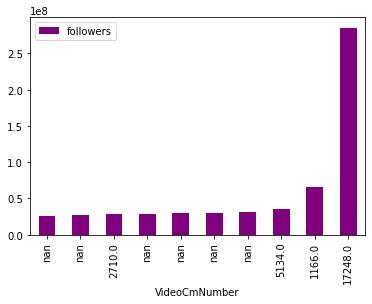

In [176]:
merged_4.plot.bar( x = 'VideoCmNumber',y = 'followers', color = 'purple')